In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#opening the new csv file for our data
df = pd.read_csv('Clean_AviationIII.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [3]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Make_Model', 'Total_Injuries', 'Total_Passengers',
       'created_year'],
      dtype='object')

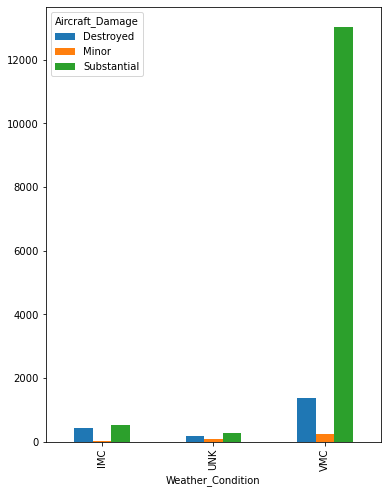

In [4]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.plot(kind='bar', figsize=(6,8),use_index = True)

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

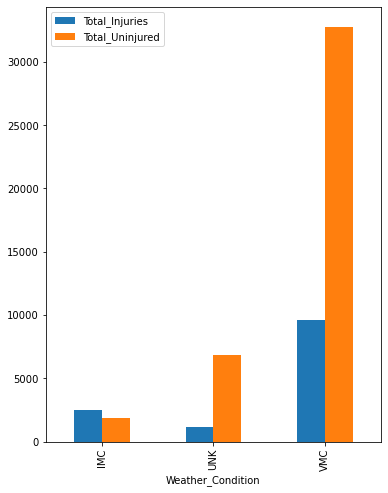

In [5]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

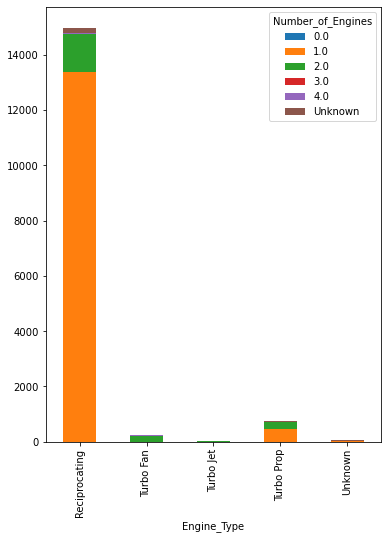

In [6]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

In [7]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

make_df['Injury_Rate'] = 1 - (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-7-9df98f3dcd95>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])


Injury_Rate                               
Engine_Type        Reciprocating Turbo Fan   Unknown Turbo Prop
Make                                                           
Cessna                  0.661820  0.748503  0.000000   0.636364
Piper                   0.626357  0.000000  0.000000   0.520000
Beech                   0.549922  0.000000  0.000000   0.693084
Boeing                  0.000000  0.949670  0.522228   0.000000
Mooney                  0.494905  0.000000  0.000000   0.000000
Cirrus design corp      0.480769  0.000000  0.000000   0.000000
Bellanca                0.640199  0.000000  0.000000   0.000000
Grumman                 0.542208  0.000000  0.000000   0.000000
Aeronca                 0.610224  0.000000  0.000000   0.000000
Air tractor             0.000000  0.000000  0.000000   0.594684
Cirrus                  0.515306  0.000000  0.000000   0.000000
Champion                0.635628  0.000000  0.000000   0.000000
Stinson                 0.636364  0.000000  0.000000   0.000000
Luscombe                0.600000  0.000000  0.000000   0.000000
Maule                   0.763889  0.000000  0.000000   0.000000

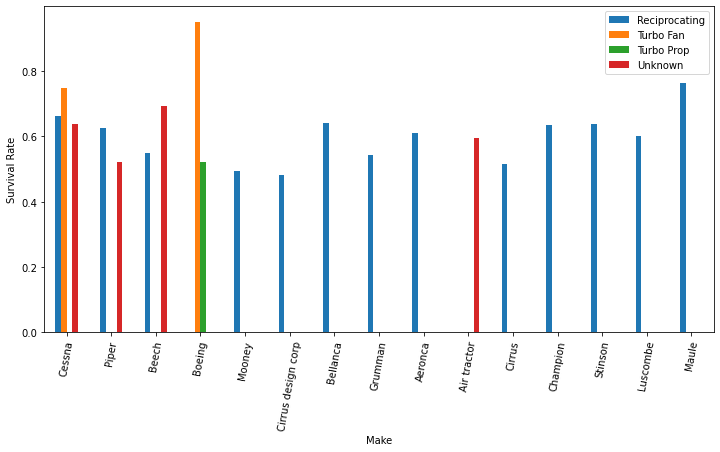

In [8]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Prop',
'Unknown'])
ax.set_ylabel('Survival Rate');

In [9]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model               Engine_Type  
Cessna 172               Reciprocating    739
Cessna 152               Reciprocating    412
Cessna 172N              Reciprocating    298
Cessna 182               Reciprocating    285
Cessna 172S              Reciprocating    253
Cessna 180               Reciprocating    227
Piper PA28               Reciprocating    222
Cessna 150               Reciprocating    216
Piper PA-28-140          Reciprocating    200
Cessna 172M              Reciprocating    198
Piper PA-18-150          Reciprocating    188
Cessna 172P              Reciprocating    157
Beech A36                Reciprocating    148
Piper PA-28-161          Reciprocating    132
Cessna 140               Reciprocating    120
Piper PA-28-180          Reciprocating    120
Cirrus design corp SR22  Reciprocating    118
Cessna 170B              Reciprocating    116
Piper PA-28-181          Reciprocating    106
Piper PA-18              Reciprocating    104
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [10]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make', 'Total_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

model_df['Injury_Rate'] = 1 - (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df

<ipython-input-10-ad976a0844ac>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Injury_Rate
Make_Model,
Cessna 172,0.699007
Boeing 747-2B6B,0.000000
Boeing 747-300,0.000000
Cessna 182,0.612628
Boeing 767,0.872674
Cessna 172N,0.627451
Boeing 737,0.909375
Beech A36,0.434783
Boeing 777-200ER,0.381107


<ipython-input-11-085edf287537>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df.index, rotation=80)


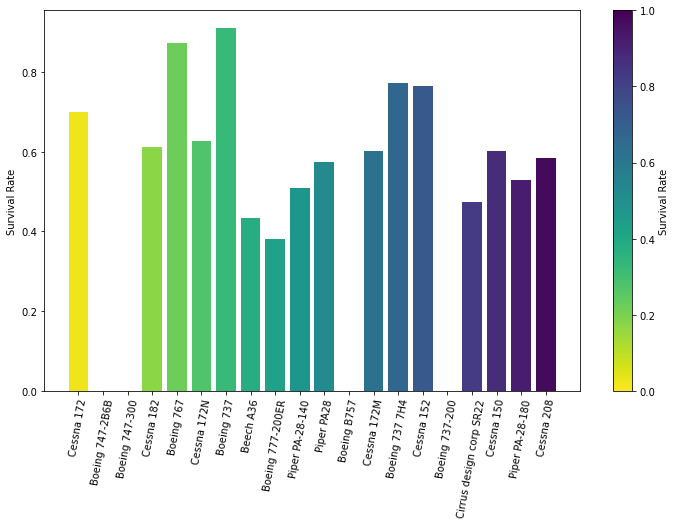

In [11]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0,1, len(model_df) + 1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

# model_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax,legend=False, color =colors)
# ax.set_ylabel('Survival Rate');

for index, (make, row) in enumerate(model_df.iterrows()):
    color = colors[index]
    ax.bar(make, row['Injury_Rate'], color = color)

ax.set_xticklabels(model_df.index, rotation=80)
ax.set_ylabel('Survival Rate')
sm = plt.cm.ScalarMappable(cmap = color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Survival Rate')

In [12]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Make_Model', 'Total_Injuries', 'Total_Passengers',
       'created_year'],
      dtype='object')

In [13]:
safety_scores = df['Make'].value_counts()[:20]

Safety_scores_df = df[df['Make'].isin(safety_scores.index)][['Make', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]

Safety_scores_df = df.groupby(['Make'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

Safety_scores_df['Injury_Rate'] = Safety_scores_df['Total_Injuries']/Safety_scores_df['Total_Passengers']
Safety_scores_df['Fatality_Rate'] = Safety_scores_df['Total_Fatal_Injuries']/Safety_scores_df['Total_Passengers']
Safety_scores_df

,Total_Injuries,Total_Fatal_Injuries,Total_Passengers,Injury_Rate,Fatality_Rate
Make,,,,,
Cessna,4882.0,2106.0,14356.0,0.340067,0.146698
Piper,3016.0,1437.0,8006.0,0.376717,0.179490
Boeing,2097.0,951.0,24580.0,0.085313,0.038690
Beech,1416.0,844.0,3324.0,0.425993,0.253911
Mooney,347.0,175.0,687.0,0.505095,0.254731
Cirrus design corp,189.0,110.0,366.0,0.516393,0.300546
Grumman,156.0,55.0,348.0,0.448276,0.158046
Bellanca,145.0,61.0,403.0,0.359801,0.151365
Air tractor,145.0,59.0,385.0,0.376623,0.153247


In [16]:
damage_list = df[df['Make'].isin(safety_scores.index)][['Make', 'Aircraft_Damage']]
damage_df = damage_list[['Make','Aircraft_Damage']].value_counts().to_frame()
damage_df = damage_df.groupby(['Make','Aircraft_Damage']).sum()
damage_df


0
Make               Aircraft_Damage      
Aero commander     Destroyed          17
                   Substantial        76
Aeronca            Destroyed          14
                   Minor               4
                   Substantial       187
Air tractor        Destroyed          46
                   Minor               4
                   Substantial       326
Beech              Destroyed         255
                   Minor              36
                   Substantial      1138
Bellanca           Destroyed          27
                   Minor               3
                   Substantial       238
Boeing             Destroyed          25
                   Minor             120
                   Substantial       195
Cessna             Destroyed         797
                   Minor              79
                   Substantial      6538
Champion           Destroyed          16
                   Substantial       142
Cirrus             Destroyed          22
                   Minor               3
                   Substantial        75
Cirrus design corp Destroyed          29
                   Minor               9
                   Substantial       141
Grumman            Destroyed          61
                   Minor               2
                   Substantial       168
Luscombe           Destroyed           9
                   Substantial       143
Maule              Destroyed          12
                   Minor               1
                   Substantial       204
Mooney             Destroyed          55
                   Minor               4
                   Substantial       306
North american     Destroyed          17
                   Minor               5
                   Substantial        81
Piper              Destroyed         534
                   Minor              50
                   Substantial      3560
Stinson            Destroyed           7
                   Substantial       131
Taylorcraft        Destroyed           6
                   Minor               3
                   Substantial        95
Vans               Destroyed          13
                   Substantial        72

safety score

I = injury rate
F = fatality rate
D = damage
    Destroyed - 3
    Substantial - 2
    Minor - 1



In [ ]:
#most dangerous pivot table
most_damage = pd.pivot_table(df, columns = ['Aircraft_Damage'], index = 'Make', aggfunc = 'size')

#convert to dataframe
most_damage_df = most_damage.reset_index()
most_damage_df = most_damage_df.set_index('Make')
most_damage_df[["Destroyed","Minor","Substantial"]] = most_damage_df[["Destroyed","Minor","Substantial"]].fillna(0)

#drop unknown column
most_damage_df.drop(columns = 'Unknown', inplace = True)
most_damage_df